In [1]:
from api.config.database import engine_map

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [2]:
data = pd.read_csv('assets/datasets/amazon.csv')

In [3]:
data.rating_count = data.rating_count.str.replace(',', '').apply(float)
data.rating_count = data.rating_count.fillna(data.rating_count.mean())

In [4]:
data = data[data.rating != '|']

Rating-based sentiment distribution:
rating_sentiment
positive    1110
neutral      348
negative       6
Name: count, dtype: int64

Review content sentiment distribution in sample:
review_sentiment
positive    1273
negative     139
neutral       52
Name: count, dtype: int64


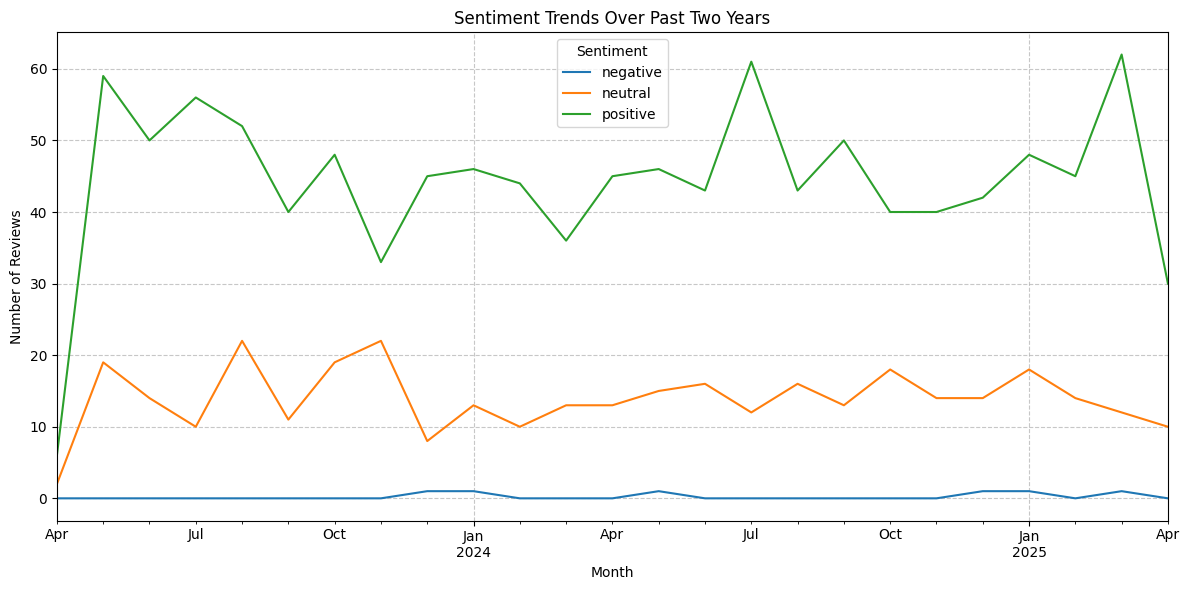

In [5]:
# Code Cell 1: Add sale date column for the past two years
# Import necessary libraries
import numpy as np
import datetime
import random
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Calculate date range for the past two years
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365*2)

# Generate random dates within the past two years
def random_dates(start, end, n):
    start_u = start.timestamp()
    end_u = end.timestamp()
    return [datetime.datetime.fromtimestamp(np.random.uniform(start_u, end_u)) for _ in range(n)]

# Create random sale dates for each row in the dataframe
sale_dates = random_dates(start_date, end_date, len(data))
data['sale_date'] = sale_dates

# Display the first few rows with the new sale_date column
data[['product_name', 'category', 'rating', 'sale_date']].head()

# Code Cell 2: Install spaCy if not already installed
# !pip install spacy
# !python -m spacy download en_core_web_sm

# Code Cell 3: Sentiment Analysis with spaCy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define a simple sentiment analysis function based on ratings
def classify_sentiment(rating):
    if pd.isna(rating):
        return 'neutral'
    
    try:
        rating_float = float(rating)
        if rating_float >= 4.0:
            return 'positive'
        elif rating_float >= 3.0:
            return 'neutral'
        else:
            return 'negative'
    except (ValueError, TypeError):
        return 'neutral'

# Apply sentiment classification based on rating
data['rating_sentiment'] = data['rating'].apply(classify_sentiment)

# Function to analyze review content with spaCy
def analyze_review_sentiment(review):
    if pd.isna(review) or review == '':
        return 'neutral'
    
    # Define sentiment lexicon
    positive_words = {'good', 'great', 'excellent', 'awesome', 'amazing', 'love', 'best', 'perfect',
                      'quality', 'nice', 'worth', 'satisfied', 'recommended', 'value', 'sturdy'}
    negative_words = {'bad', 'poor', 'terrible', 'worst', 'awful', 'disappointed', 'waste', 'cheap',
                     'issue', 'problem', 'not', 'cannot', "doesn't", 'slow', 'break'}
    
    # Process the text with spaCy
    doc = nlp(str(review).lower())
    
    # Count positive and negative words
    pos_count = 0
    neg_count = 0
    
    for token in doc:
        if token.text in positive_words:
            pos_count += 1
        elif token.text in negative_words:
            neg_count += 1
    
    # Determine sentiment based on counts
    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'

data['review_sentiment'] = data['review_content'].apply(analyze_review_sentiment)

# Display the sentiment distribution
print("Rating-based sentiment distribution:")
print(data['rating_sentiment'].value_counts())

print("\nReview content sentiment distribution in sample:")
print(data['review_sentiment'].value_counts())

# Code Cell 4: Visualize sentiment trends
import matplotlib.pyplot as plt

# Add month column for easier grouping
data['sale_month'] = data['sale_date'].dt.to_period('M')

# Group by month and sentiment, count occurrences
sentiment_over_time = data.groupby(['sale_month', 'rating_sentiment']).size().unstack().fillna(0)

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', ax=plt.gca())
plt.title('Sentiment Trends Over Past Two Years')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show() 

In [6]:
data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,sale_date,rating_sentiment,review_sentiment,sale_month
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,2024-01-22 00:27:15.432214,positive,positive,2024-01
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,2025-03-17 15:01:33.790159,positive,positive,2025-03
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,2024-10-09 00:02:42.954202,neutral,positive,2024-10
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,2024-07-03 16:00:28.971549,positive,positive,2024-07
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,2023-08-15 12:57:28.746258,positive,positive,2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,2024-08-16 15:11:05.434787,positive,positive,2024-08
1461,B01M6453MB,Prestige Delight PRWO Electric Ri

In [7]:
data['main_category'] = data.category.apply(lambda row: row.split('|')[0])

In [8]:
new_cols = [col.replace('_', ' ').title().replace(' ', '') for col in data.columns]

In [9]:
data.columns = new_cols

In [10]:
data.Rating = data.Rating.astype(float)

### Top products by Category

In [11]:
category_sales = data.groupby('MainCategory')['ProductId'].count().sort_values(ascending=False) 
category_sales_rel = (category_sales / category_sales.sum()).reset_index()

In [12]:
px.bar(category_sales.reset_index(), x='ProductId', y='MainCategory', orientation='h', color='MainCategory')

In [13]:
px.pie(labels=category_sales_rel['MainCategory'], values=category_sales_rel['ProductId'], hole=.6)

### Overall Sales

In [14]:
sales_by_month = (
    data.groupby(['SaleMonth', 'MainCategory'])
    ['ProductId'].count()
    .reset_index()
    .pivot(index='SaleMonth', columns='MainCategory', values='ProductId')
    .fillna(0)
)

sales_by_month.index = sales_by_month.index.astype(str)

In [15]:
px.bar(sales_by_month, text_auto=True)

In [16]:
px.bar(sales_by_month.cumsum(), text_auto=True)

In [17]:
sales_by_month_rel = sales_by_month.divide(sales_by_month.sum(axis=1), axis=0).round(2)
px.bar(sales_by_month_rel, text_auto=True)

### Sentiment over time

In [18]:
data.groupby(['SaleMonth', 'ReviewSentiment']) \
.agg(
    count=('ProductId', 'count'),
    avg_rating = ('Rating', 'mean')
)

count  avg_rating
SaleMonth ReviewSentiment                   
2023-04   positive             8    4.075000
2023-05   negative             6    3.966667
          neutral              6    4.000000
          positive            66    4.125758
2023-06   negative             6    3.883333
...                          ...         ...
2025-03   neutral              4    4.175000
          positive            67    4.162687
2025-04   negative             7    3.900000
          neutral              2    4.000000
          positive            31    4.116129

[70 rows x 2 columns]

In [19]:
sentiment_time = (
    data.groupby(['SaleMonth', 'ReviewSentiment'])
    ['ProductId'].count()
    .reset_index()
    .pivot(columns='ReviewSentiment', index='SaleMonth', values='ProductId')
    .fillna(0)
)

sentiment_time.index = sentiment_time.index.astype(str)

In [20]:
sentiment_time_rel = sentiment_time.divide(sentiment_time.sum(axis=1), axis=0).round(2)

In [21]:
sentiment_time = sentiment_time_rel

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# First, prepare the data for the line chart (average ratings)
# Assuming sentiment_time has the count data and we need to get avg_rating separately
avg_rating_by_month = (
    data.groupby('SaleMonth')['Rating'].mean()
)
avg_rating_by_month.index = avg_rating_by_month.index.astype(str)

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add stacked bar chart for sentiment counts
for sentiment in sentiment_time.columns:
    fig.add_trace(
        go.Bar(
            x=sentiment_time.index,
            y=sentiment_time[sentiment],
            name=f"{sentiment}",
            text=sentiment_time[sentiment],
            textposition='auto'
        ),
        secondary_y=False
    )

# Add line chart for average ratings on secondary axis
fig.add_trace(
    go.Scatter(
        x=avg_rating_by_month.index,
        y=avg_rating_by_month.values,
        name="Average Rating",
        line=dict(color='red', width=3),
        mode='lines+markers',
    ),
    secondary_y=True
)

# Set titles and labels
fig.update_layout(
    title_text="Product Sentiment Counts and Average Ratings by Month",
    barmode='stack'
)

fig.update_yaxes(title_text="Sentiment classification", secondary_y=False)
fig.update_yaxes(
    title_text="Average Rating", 
    secondary_y=True,
    range=[1, 5],
)


# Show the figure
fig.show()



In [108]:
print(avg_rating_by_month.values)

[4.075      4.10384615 4.1015625  4.14848485 4.08378378 4.08235294
 4.07910448 4.01818182 4.11111111 4.05       4.15740741 4.08979592
 4.01896552 4.05967742 4.10847458 4.16027397 4.09661017 4.11428571
 4.09482759 4.13148148 4.04912281 4.10746269 4.08305085 4.15466667
 4.0725    ]


In [107]:
avg_rating_by_month.index

Index(['2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09',
       '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03',
       '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09',
       '2024-10', '2024-11', '2024-12', '2025-01', '2025-02', '2025-03',
       '2025-04'],
      dtype='object', name='SaleMonth')

In [23]:
data.SaleMonth = data.SaleMonth.astype(str)

In [24]:
data.ActualPrice = (
    data
    .ActualPrice
    .str[1:]
    .str.replace(',', '')
    .str.replace('.', '')
    .astype(int)
)

In [25]:
data.DiscountedPrice = (
    data
    .DiscountedPrice
    .str[1:]
    .str.replace(',', '')
    .str.replace('.', '')
    .astype(int)
)

In [26]:
data.DiscountPercentage = data.DiscountPercentage.str[:-1].astype(int) / 100

In [27]:
# data.to_csv('assets/datasets/amazon_processed.csv')

In [29]:
data.MainCategory.unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [91]:
from pydantic import BaseModel, Field
from typing import List, Literal, get_args
from datetime import date, timedelta

class AmazonQueryParams(BaseModel):
    categories: List[
        Literal[
            'Computers&Accessories',
            'Electronics',
            'MusicalInstruments',
            'OfficeProducts',
            'Home&Kitchen',
            'HomeImprovement',
            'Toys&Games',
            'Car&Motorbike',
            'Health&PersonalCare'
        ] | None
    ] = Field(default=[])

    sale_date_range: List[date] = Field(
        default_factory=lambda: [
            date.today() - timedelta(days=365*2),
            date.today()
        ]
    )

    rating_range: List[float] = Field(
        default_factory=lambda: [0.0, 5.0]
    )

    granularity: Literal[
        'year',
        'quarter',
        'month'
    ] = Field(default='month')

    @classmethod
    def get_categroies(cls):
        cat_annotations = list(cls.__annotations__['categories'].__args__)
        cat_values = [val for val in get_args(cat_annotations[0])][0].__args__
        return cat_values

    @classmethod
    def get_granularities(cls):
        return list(cls.__annotations__['granularity'].__args__)
    
    @classmethod
    def get_rating_range(cls):
        return cls.model_fields['rating_range'].default_factory()
    
    @property
    def is_default(self) -> bool:
        """
        Check if the instance has all default values.
        
        Returns:
            bool: True if all parameters are set to default values, False otherwise.
        """
        # Check categories (default is empty list)
        if self.categories != []:
            return False
        
        # Check sale_date_range using existing method
        default_date_range = self.__class__.model_fields['sale_date_range'].default_factory()
        if self.sale_date_range != default_date_range:
            return False
        
        # Check rating_range using existing method
        if self.rating_range != self.__class__.get_rating_range():
            return False
        
        # Check granularity (default is 'month')
        if self.granularity != 'month':
            return False
        
        return True

In [92]:
filters = AmazonQueryParams()

In [93]:
filters.is_default

True

In [88]:
AmazonQueryParams.get_rating_range()

[0.0, 5.0]

In [96]:
minr, maxr = filters.get_rating_range()
marks=[{'value': val, 'label': val} for val in range(int(minr) + 1, int(maxr) + 1)]

In [97]:
marks

[{'value': 1, 'label': 1},
 {'value': 2, 'label': 2},
 {'value': 3, 'label': 3},
 {'value': 4, 'label': 4},
 {'value': 5, 'label': 5}]

In [99]:
sales_variant_type = Literal[
    'amount',
    'price',
    'discount'
]

class SalesCallbackParams(BaseModel):
    variant: sales_variant_type = Field(default='amount')

    is_relative: bool | None = None
    is_running: bool | None = None


    @classmethod
    def get_variants(cls):
        return list(cls.__annotations__['variant'].__args__) 

In [104]:
SalesCallbackParams.model_fields['variant'].default

'amount'